In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("enrollment.csv")
df = df.drop_duplicates()

In [3]:
duplicated = df.duplicated().sum()
print(duplicated)

0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982615 entries, 0 to 1006006
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            982615 non-null  object
 1   state           982615 non-null  object
 2   district        982615 non-null  object
 3   pincode         982615 non-null  int64 
 4   age_0_5         982615 non-null  int64 
 5   age_5_17        982615 non-null  int64 
 6   age_18_greater  982615 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 60.0+ MB


In [5]:
population = df
population = population.drop(columns = ['date', 'district', 'pincode'])
print(population.info())

<class 'pandas.core.frame.DataFrame'>
Index: 982615 entries, 0 to 1006006
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   state           982615 non-null  object
 1   age_0_5         982615 non-null  int64 
 2   age_5_17        982615 non-null  int64 
 3   age_18_greater  982615 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 37.5+ MB
None


In [6]:
grouped = population.groupby('state').agg({
    'age_0_5' : 'sum',
    'age_5_17' : 'sum',
    'age_18_greater' : 'sum'
}).reset_index()

In [7]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   state           39 non-null     object
 1   age_0_5         39 non-null     int64 
 2   age_5_17        39 non-null     int64 
 3   age_18_greater  39 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.3+ KB


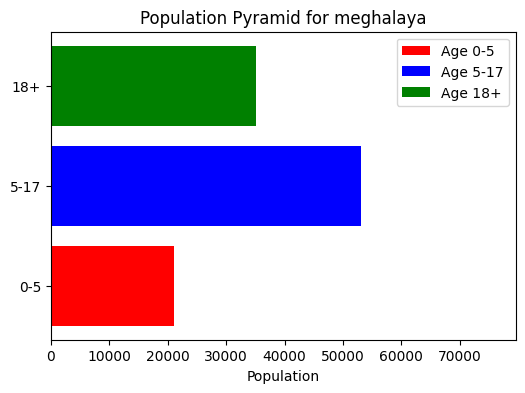

In [20]:
for _, row in grouped.iterrows():
    state = row['state']
    age_groups = ['0-5','5-17', '18+']
    values = [row['age_0_5'],row['age_5_17'], row['age_18_greater']]
    if values[0] < values[2]:
        fig, ax = plt.subplots(figsize=(6,4))
        ax.barh(age_groups[0], values[0], color='red', label='Age 0-5')
        # Left side: 5-17 (negative values)
        ax.barh(age_groups[1], values[1], color='blue', label='Age 5-17')
    
        # Right side: 17+ (positive values)
        ax.barh(age_groups[2], values[2], color='green', label='Age 18+')
    
        # Formatting
        ax.set_xlabel("Population")
        ax.set_title(f"Population Pyramid for {state}")
        ax.legend()
    
        # Symmetric x-axis
        max_val = max(values)
        ax.set_xlim(0, max_val*1.5)
    
        plt.show()